In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator, ScalarFormatter
import joblib

import seaborn as sns
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#工作路径
import os
os.chdir('F:\作业文件\BVOC-SOA\CI\论文2：异质性效应')
print(os.getcwd())

F:\作业文件\BVOC-SOA\CI\论文2：异质性效应


In [3]:
columnnameen = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
                'NOx',
                'O$_3$',
                'PM$_1$',
                'SO$_2$',
                'Radiation',
                'Temperature',
                'Humidity',
                'TICCLabel',
                'Month',
                'KMeansLabel']
columnname = [
   'Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
    'NOx',
    'O3',
    'PM1',
    'SO2',
    'Radiation',
    'Temperature',
    'Humidity',
    'TICCLabel',
    "Place",
    'Month',
    'KMeansLabel'
]

Xcolname=[   'NOx',
    f'O$_3$',
    f'SO$_2$',
    'Radiation',
    'Temperature',
    'Humidity',
            ]

Tname = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene']
yname = ['PM1']
Xname = ['NOx',
         'O3',
         'SO2',
         'Radiation',
         'Temperature',
         'Humidity', ]
Wname = ["Place",
         'Month',
         'KMeansLabel']

In [4]:
data = pd.read_excel("dataDMLnoscale.xlsx", index_col=0)

clusterDML = ['异戊二烯浓度', '1,3-丁二烯浓度', '丁烯浓度', '戊烯浓度', 'NOx', 'O3', 'PM1', 'SO2', '地面层净辐射',
              '地面层温度', '地面层湿度']
#金海
Month = ["Aug", "Sept", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
#金海的合并
datajh = joblib.load("datanpjh.pkl")
datadicjh = joblib.load("datanpjh.pkl")
dataTVOCjh = joblib.load("TVOCjh")
dataTVOCVMDtempjh = pd.DataFrame(joblib.load("dataTVOCVMDjh.pkl"))
datatempjh = joblib.load('dataVMDjh.pkl')
datatempmjh = []
dataTVOCVMDjh = []
A = 0
B = 0
for i in range(len(datajh)):
    A = A + datadicjh[i].shape[0]
    datatempmjh.append(datatempjh.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDjh.append(dataTVOCVMDtempjh.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadicjh[i].shape[0]
#崇明
#崇明的合并
datacm = joblib.load("datanpcm.pkl")
datadiccm = joblib.load("datanpcm.pkl")
dataTVOCcm = joblib.load("TVOCcm")
dataTVOCVMDtempcm = pd.DataFrame(joblib.load("dataTVOCVMDcm.pkl"))
datatempcm = joblib.load('dataVMDcm.pkl')
dataTVOCVMDcm = []
datatempmcm = []
A = 0
B = 0
for i in range(len(datacm)):
    A = A + datadiccm[i].shape[0]
    datatempmcm.append(datatempcm.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDcm.append(dataTVOCVMDtempcm.loc[B:(A - 1)].reset_index(drop=True))
    B = B + datadiccm[i].shape[0]
monthchoose = [Month.index("Aug"), Month.index("Jun"), Month.index("Jul")]
place = ["jh", "cm"]
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# data=grouped_data
data.columns = columnname
X = data[Xname]
T = data[Tname]
y = np.array(data[yname]).ravel()
Dummy = [pd.get_dummies(data[i], prefix=i, drop_first=True) for i in Wname]
W = pd.concat([Dummy[0], Dummy[1], Dummy[2]], axis=1)

# Use StandardScaler to normalize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=Xname)
from sklearn.model_selection import train_test_split

# 将数据集分割为训练集和测试集（例如，80% 训练，20% 测试）
X_train, X_test, T_train, T_test, W_train, W_test, y_train, y_test = train_test_split(
    X_scaled, T, W, y, test_size=0.2, random_state=42
)
N = 100
# Redefine columnname from the data columns

# Set the numerical and categorical columns
numerical_cols = columnname[:-4]  # All columns except the last three
categorical_cols = columnname[-4:]  # Last three columns

# Process the numerical columns
grouped_numerical = data[numerical_cols].groupby(data.index // N).mean()

# Process the categorical columns by taking the mode (most frequent category)
grouped_categorical = data[categorical_cols].groupby(data.index // N).agg(lambda x: x.value_counts().index[0])
# Concatenate the results
grouped_data = pd.concat([grouped_numerical, grouped_categorical], axis=1)
grouped_data  # Display the first few rows for review
estimator = joblib.load("estimator_train.pkl")
# 获取每个观察值的处理效应
effects = estimator.marginal_effect(X=X_scaled, T=T)
ate = estimator.marginal_ate(X=X_scaled, T=T)

In [5]:

# 获取初始效应
initial_effects = estimator.marginal_effect(X=X_scaled, T=T)
# 如果effects是四列，求每一行的总和
summed_effects = np.sum(initial_effects, axis=1)

# 定义控制的阈值
threshold = np.sum(ate)  # 仅当效应值高于2时才需要控制

# PID参数
Kp = 0.1
Ki = 0.01
Kd = 0.05

# 目标变化率，只有当实际效应超过阈值时才设为0，否则维持当前效应值
vy_target = np.where(summed_effects > threshold, 0, summed_effects)

# 计算误差
e = vy_target - summed_effects

# 初始化控制信号
u = np.zeros_like(e)

# 重置积分间隔
reset_interval = 5000

# 初始化积分
integral = 0

# 计算PID控制信号
for i in range(1, len(e)):
    if i % reset_interval == 0:
        integral = 0  # Reset the integral at specified intervals

    integral += e[i] * (i - (i - 1))  # Accumulate integral over time
    derivative = (e[i] - e[i - 1]) / (i - (i - 1))
    u[i] = Kp * e[i] + Ki * integral + Kd * derivative
    u[i] = min(0, u[i])  # Ensure that control signal can only decrease X

# 调整控制变量
X_adjusted = X_scaled.copy()
control_limit = X_adjusted.shape[1] - 3  # Assume the last three elements are not controllable
for i in range(X_adjusted.shape[0]):
    if summed_effects[i] > threshold:
        for j in range(control_limit):  # Only adjust the first n-3 elements
            reduction_amount = max(u[i], -X_adjusted[i, j])  # Ensure we do not go negative
            X_adjusted[i, j] += reduction_amount  # Apply the negative or zero reduction

# 重新计算效应检查控制的影响
adjusted_effects = estimator.marginal_effect(X=X_adjusted, T=T)
summed_adjusted_effects = np.sum(adjusted_effects, axis=1)
data['SOA sca'] = summed_effects
data['SOA adj'] = summed_adjusted_effects
data['u'] = u
for i, j in enumerate(['NOx',
                       'O3',
                       'SO2']):
    data[j + ' adj'] = X_adjusted[:, i]
    data[j + ' sca'] = X_scaled[:, i]
data

,Isoprene,"1,3-Butadiene",Butene,Pentene,NOx,O3,PM1,SO2,Radiation,Temperature,...,KMeansLabel,SOA sca,SOA adj,u,NOx adj,NOx sca,O3 adj,O3 sca,SO2 adj,SO2 sca
0,0.824809,1.023420,6.039046e-02,1.020860,10.398318,37.210485,12.171348,3.061825,56.636985,36.724194,...,2,0.044248,0.044248,0.0,0.395624,0.395624,1.109989,1.109989,-0.603174,-0.603174
1,0.824966,1.023651,6.040172e-02,1.020763,10.398269,37.210187,12.171461,3.061805,56.642700,36.724215,...,2,0.044353,0.044353,0.0,0.395615,0.395615,1.109972,1.109972,-0.603184,-0.603184
2,0.825225,1.024082,6.042065e-02,1.020372,10.398206,37.209573,12.171639,3.061767,56.654085,36.724259,...,2,0.044566,0.044566,0.0,0.395605,0.395605,1.109935,1.109935,-0.603202,-0.603202
3,0.825264,1.024721,6.045804e-02,1.019937,10.398165,37.208622,12.171892,3.061712,56.671141,36.724324,...,2,0.044887,0.044887,0.0,0.395598,0.395598,1.109879,1.109879,-0.603228,-0.603228
4,0.824389,1.025512,6.051097e-02,1.019362,10.398151,37.207335,12.172202,3.061642,56.693861,36.724411,...,2,0.045316,0.045316,0.0,0.395595,0.395595,1.109802,1.109802,-0.603262,-0.603262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76353,0.069446,0.016855,2.216370e-08,0.004844,8.495156,15.707872,7.337394,1.558032,2.717827,36.618016,...,0,0.790580,0.790580,0.0,0.074823,0.074823,-0.168948,-0.168948,-1.320914,-1.320914
76354,0.069386,0.016841,1.394885e-08,0.004841,8.495056,15.708468,7.337082,1.557816,2.717821,36.618026,...,0,0.790600,0.790600,0.0,0.074806,0.074806,-0.168913,-0.168913,-1.321017,-1.321017
76355,0.069327,0.016831,2.214623e-08,0.004839,8.494978,15.708930,7.336853,1.557647,2.717818,36.618033,...,0,0.790620,0.790620,0.0,0.074793,0.074793,-0.168885,-0.168885,-1.321097,-1.321097
76356,0.069282,0.016825,1.394903e-08,0.004839,8.494924,15.709247,7.336680,1.557531,2.717815,36.618039,...,0,0.790637,0.790637,0.0,0.074784,0.074784,-0.168867,-0.168867,-1.321153,-1.321153


In [6]:
# Reload the data
datacluster = pd.read_excel("dataDMLnoscale.xlsx", index_col=0)
from matplotlib.patches import Patch


def remove_outliers(ser):
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 计算序列的均值
    mean_value = ser.mean()

    # 将异常值替换为均值
    ser[(ser < lower_bound) | (ser > upper_bound)] = mean_value

    return ser


# 提取月份和地点的子集数据
def get_month_data(location, month):
    subset = datacluster[(datacluster["Place"] == location) & (datacluster["Month"] == month)]
    return subset


def clusterplot(data, column, columnchoose, cluster, fig, ax):
    clusterN = 4
    data.columns = column
    data["cluster"] = cluster
    from sklearn.preprocessing import MinMaxScaler

    t = data.index
    color = cluster_colors

    for i in range(clusterN):
        cluster_data = data.cluster.copy()
        cluster_data.columns = "label"
        if i != 0:
            cluster_data[cluster_data != i] = 0
            cluster_data[cluster_data == i] = 1
        if i == 0:
            cluster_data[cluster_data != 0] = -2
            cluster_data[cluster_data == 0] = 1
            cluster_data[cluster_data != 1] = 0

        y = cluster_data.values
        splits = np.where(y[1:] != y[:-1])[0] + 1
        splits = np.concatenate(([0], splits, [len(y) - 1]))

        for k in range(len(splits) - 1):
            if y[splits[k]]:
                ax.axvspan(t[splits[k]], t[splits[k + 1]], alpha=0.5, color=color[i])
    ax.set_xlim(-100, np.max(list(data.index)) + 1200)
    # plt.legend(frameon=False, loc="right", fontsize=7)
    plt.tight_layout()


# 更新的变量、颜色、线型和真实名称列表
variables_to_plot = ["SOA", 'NOx',
                     'O3',
                     'SO2']
cpal = ["#2A4C65", "#646D20"]
linestyle = ['-.', '-', '-', '-', '-', '--', '--', '--', ':', ':', ':']  # 您可能需要根据您的需要进行调整
realnamesunit = ['PM$_1$ ($μg/m^3$)', 'NO$_x$ (ppb)', 'O$_3$ (ppb)', 'SO$_2$ (ppb)']
realnames = ['SOA生成效应\n$∂SOA$ ($μg/m^3$)', '控制前序列\nOrigin', '控制后序列\nAdjusted']
cluster_colors = ['#94A684', '#FFDBAA', '#E4E4D0', '#FFEEF4']

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

C:\Users\aa271\AppData\Local\Temp\ipykernel_34676\1779969296.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

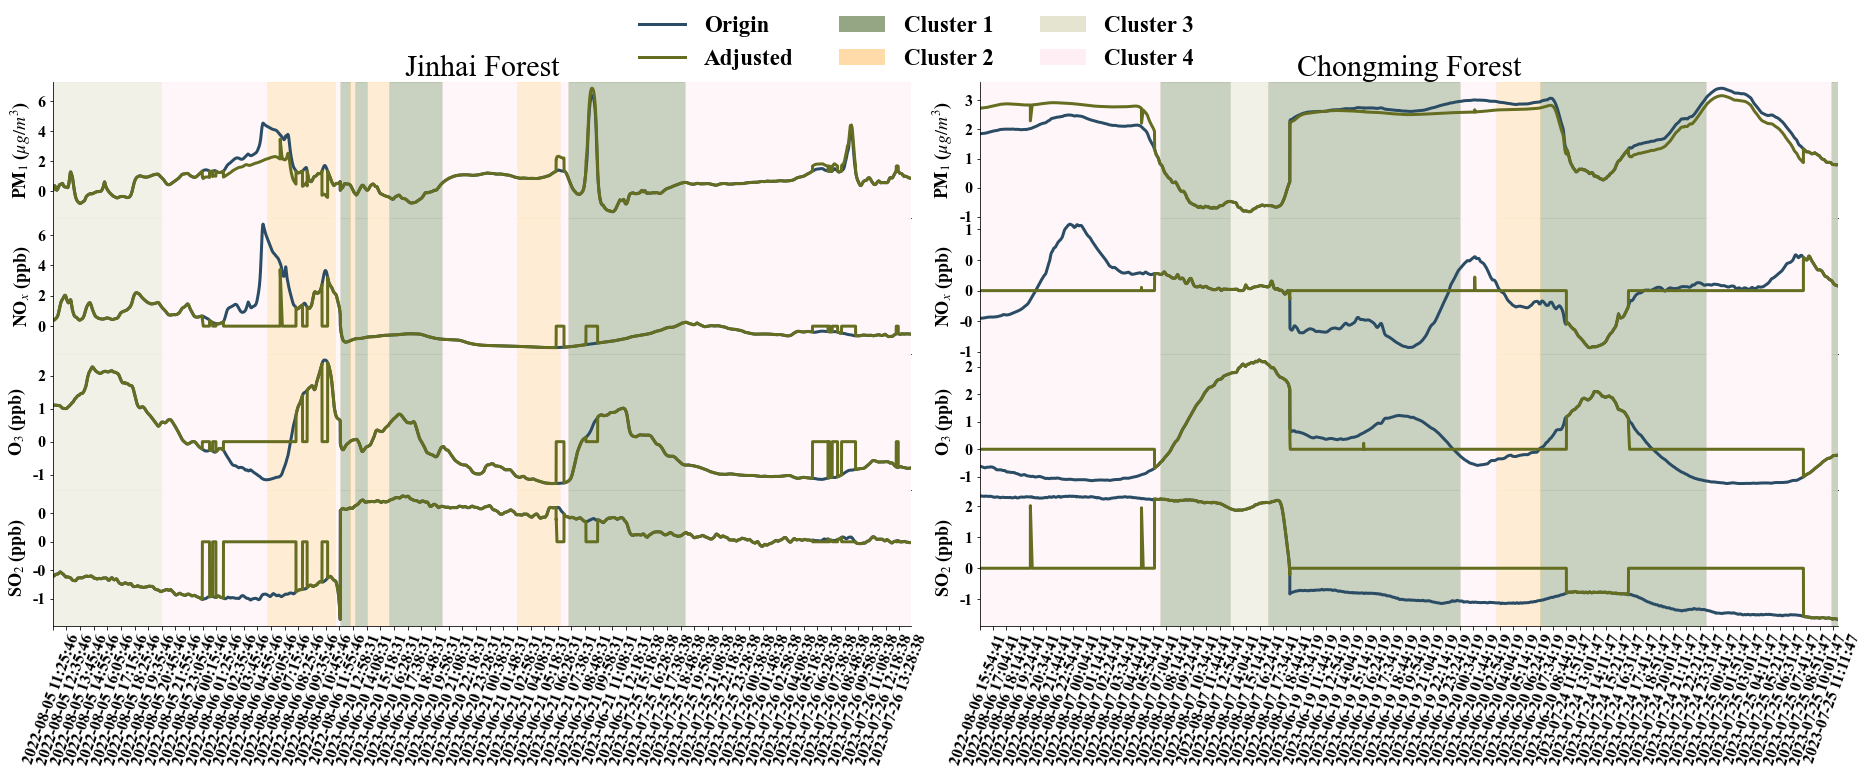

In [7]:
fig = plt.figure(figsize=(32, 10))
fig.set_facecolor('white')
# 创建一个 GridSpec 布局，根据variables_to_plot的长度
gs = fig.add_gridspec(len(variables_to_plot), 2, hspace=0, wspace=0.08)

# 遍历两个地点
for p, location in enumerate(place):
    if location == "jh":
        data_source = data[data["Place"]=="jh"].copy()
        data_source2 = datajh
        data_temp = datatempmjh
        locationname = "Jinhai"
    else:
        data_source = data[data["Place"]=="cm"].copy()
        data_temp = datatempmcm
        data_source2 = datacm
        locationname = "Chongming"

    # 使用get_month_data函数从datacluster中提取子集
    cluster_subsets = [get_month_data(location, Month[m]) for m in monthchoose]

    combined_data = data_source
    combined_data2 = pd.concat([data_source2[m] for m in monthchoose], ignore_index=False)
    combined_temp_data = pd.concat([data_temp[m] for m in monthchoose], ignore_index=True)
    combined_cluster = pd.concat(cluster_subsets, ignore_index=True)

    # 检查长度是否匹配
    if len(combined_temp_data) != len(combined_data):
        # 将较长的数据截断为较短的长度
        min_length = min(len(combined_temp_data), len(combined_data))
        combined_temp_data = combined_temp_data.iloc[:min_length]
        combined_data = combined_data.iloc[:min_length]



    for var_idx, variable in enumerate(variables_to_plot):
        # 对于每个变量，选择一个子图
        ax = fig.add_subplot(gs[var_idx, p])

        sns.lineplot(x=combined_temp_data.index, y=data_source[variable+" sca"], ax=ax, color="#2A4C65",linewidth=3)
        sns.lineplot(x=combined_temp_data.index, y=data_source[variable+" adj"], ax=ax, color="#646D20",linewidth=3)

        # 使用 clusterplot 函数绘制背景色
        clusterplot(combined_data.reset_index(drop=True), combined_data.columns, [], combined_cluster["ClusterLabel"].reset_index(drop=True).values, fig, ax)

         # 设置标题和图例
        ax.set_ylabel(realnamesunit[var_idx], fontsize=18, fontweight='bold')  # 使用realnames作为y轴标签

        # 设置x-ticks为combined_temp_data的索引
        if var_idx == len(variables_to_plot) - 1:  # 只在最后一个小子图中显示x轴标签
            interval = 600  # 每隔400个点显示一个时间
            ticks = combined_temp_data.index[::interval]
            labels = combined_data2.index[::interval]
            ax.set_xticks(ticks)
            ax.set_xticklabels(labels, rotation=70)  # rotation可以使标签旋转，提高可读性
        else:
            ax.set_xticks([])

        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlim(0, combined_temp_data.shape[0])

        if var_idx == 0:
            ax.set_title(f"{locationname} Forest", fontsize=30)

        # 移除每个子图的上和右边框
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        #设置刻度
        ax.tick_params(axis='both', labelsize=13)

        def format_ticks(x, pos):
            return f'{x:.0f}'  # 这里设置为保留两位小数，您可以根据需要进行修改
        # 设置x轴刻度的格式
        ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')
            label.set_fontsize(16)

        

        # ax.grid()
# 为了创建图例，我们将在不显示的地方绘制线
lines = [plt.Line2D([0], [0], color=cpal[i], lw=3) for i in range(2)]

# 创建代表聚类颜色的图例
cluster_patches = [Patch(facecolor=color) for color in cluster_colors]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

fig.legend(lines + cluster_patches, ['Origin', 'Adjusted'] + cluster_labels, frameon=False, loc="upper center", fontsize=23, ncol=3, bbox_to_anchor=(0.5, 1), prop={'weight': 'bold','size':23})
# fig.tight_layout()
fig.savefig("F:\作业文件\BVOC-SOA\CI\毕设图片重绘\第五章\PID审稿.svg", bbox_inches='tight')
plt.show()